In [2]:
import pandas as pd
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score
import numpy as np

# 加载数据
train_data = pd.read_csv('/content/imdb_train.csv')
test_data = pd.read_csv('/content/imdb_test.csv')

# 提取文本和标签
train_texts = train_data['text']
train_labels = train_data['label']
test_texts = test_data['text']
test_labels = test_data['label']

# 参数设置
vocab_size = 10000
max_length = 200
embedding_dim = 64
batch_size = 64
epochs = 30
oov_tok = '<OOV>'
padding_type = 'post'
trunc_type = 'post'

# 文本处理 - Tokenization 和 Padding
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(train_texts)  # 只在训练数据上fit
train_sequences = tokenizer.texts_to_sequences(train_texts)
train_padded = pad_sequences(train_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

test_sequences = tokenizer.texts_to_sequences(test_texts)
test_padded = pad_sequences(test_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

In [5]:
# 构建模型
model = Sequential([
    Embedding(vocab_size, embedding_dim, input_length=max_length),
    Dropout(0.2),
    LSTM(128, return_sequences=True),
    Dropout(0.2),
    LSTM(64),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

# 编译模型
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# 训练模型
model.fit(train_padded, train_labels, epochs=epochs, batch_size=batch_size, validation_data=(test_padded, test_labels), callbacks=[EarlyStopping(monitor='val_loss', patience=3)])

# 评估模型
predictions = model.predict(test_padded)
predicted_classes = (predictions > 0.5).astype(int)
accuracy = accuracy_score(test_labels, predicted_classes)
print(f"Test Accuracy: {accuracy*100:.2f}%")



Epoch 1/30
391/391 [==============================] - 350s 883ms/step - loss: 0.6946 - accuracy: 0.5129 - val_loss: 0.6914 - val_accuracy: 0.5298
Epoch 2/30
391/391 [==============================] - 336s 859ms/step - loss: 0.6830 - accuracy: 0.5576 - val_loss: 0.6784 - val_accuracy: 0.5648
Epoch 3/30
391/391 [==============================] - 340s 871ms/step - loss: 0.6584 - accuracy: 0.6088 - val_loss: 0.6595 - val_accuracy: 0.5601
Epoch 4/30
391/391 [==============================] - 342s 875ms/step - loss: 0.6311 - accuracy: 0.6462 - val_loss: 0.6819 - val_accuracy: 0.5637
Epoch 5/30
391/391 [==============================] - 352s 900ms/step - loss: 0.6398 - accuracy: 0.6160 - val_loss: 0.6346 - val_accuracy: 0.6185
Epoch 6/30
391/391 [==============================] - 342s 876ms/step - loss: 0.5620 - accuracy: 0.7176 - val_loss: 0.5427 - val_accuracy: 0.7257
Epoch 7/30
391/391 [==============================] - 353s 904ms/step - loss: 0.3966 - accuracy: 0.8311 - val_loss: 0.4224 -

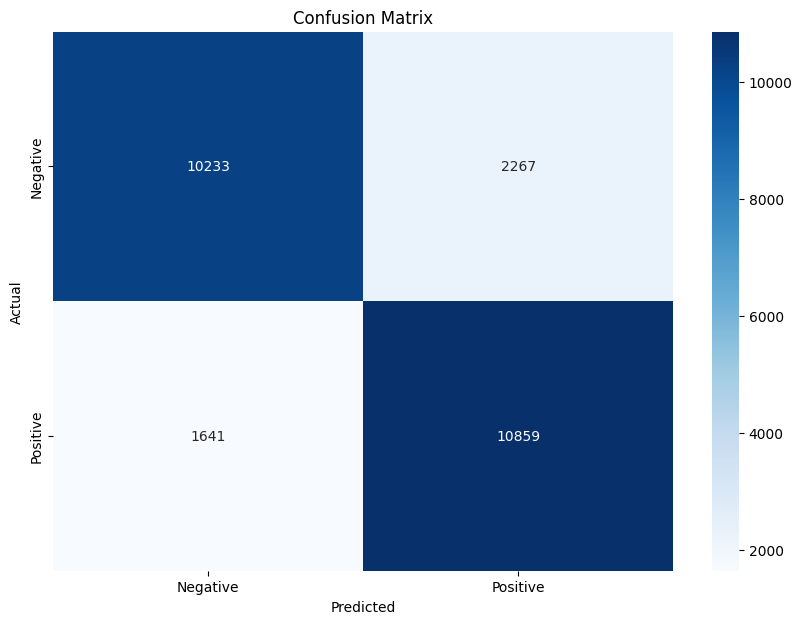

              precision    recall  f1-score   support

    Negative       0.86      0.82      0.84     12500
    Positive       0.83      0.87      0.85     12500

    accuracy                           0.84     25000
   macro avg       0.84      0.84      0.84     25000
weighted avg       0.84      0.84      0.84     25000



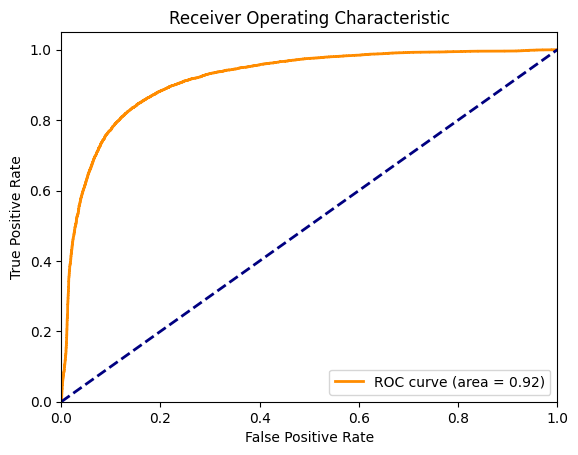

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# 计算混淆矩阵
conf_matrix = confusion_matrix(test_labels, predicted_classes)

# 使用 seaborn 绘制混淆矩阵
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()



# 输出分类报告
print(classification_report(test_labels, predicted_classes, target_names=['Negative', 'Positive']))

# 绘制ROC曲线和计算AUC
fpr, tpr, thresholds = roc_curve(test_labels, predictions)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, roc_curve, auc

# 假设你已经有了history对象，该对象在model.fit()时返回
history = model.fit(train_padded, train_labels, epochs=epochs, batch_size=batch_size,
                    validation_data=(test_padded, test_labels),
                    callbacks=[EarlyStopping(monitor='val_loss', patience=3)])

# 绘制训练和验证损失图
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

# 绘制训练和验证准确率图
plt.figure(figsize=(8, 6))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()